# <font color='green'> Tratamento, Análise de Dados e Dashboard da Felicidade Mundial </font>

## Definição do Problema: O que te faz feliz?

O Relatório de Felicidade Mundial é um conjunto de dados publicado pela Rede de Soluções de Desenvolvimento Sustentável das Nações Unidas, se trata de uma pesquisa histórica sobre o estado de felicidade global, que classifica 156 países por seus níveis de felicidade. As pesquisas têm como objetivo analisar dados de centenas de milhares de indivíduos e investigar as maneiras como os elementos da vida das pessoas impulsionam seu bem-estar. Cada país recebe uma pontuação de felicidade que é a soma das pontuações dos 7 critérios analisados. Esta análise tem como objetivo responder as seguintes questões:

- Pergunta 1 - Quais são os 10 países mais felizes?
- Pergunta 2 - Quais são os 10 países menos felizes?
- Pergunta 3 - Qual é a média do Índice de Felicidade?
- Pergunta 4 - Qual é o Índice de Felicidade por critério?
- Pergunta 5 - Qual a correlação entre a felicidade e os critérios?


O trabalho consiste em limpar e preparar os dados e então construir um dashboard no Power BI para apresentar os resultados e incorporá-lo a está análise.

Fonte da base de dados: Kaggle

## Carregando e Instalando Pacotes

In [1]:
# Versão da Linguagem Python Utilizada:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


In [2]:
# Importando os pacotes necessários:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Carregando os Dados

In [3]:
WHR = pd.read_csv("2019.csv")

In [4]:
# Primeiras 10 Linhas:
WHR.head(10)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.272
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2.246
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2.126
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2.192
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2.377


## Dicionário das Variáveis:

- **Overall rank**: Identifica a posição do país no ranking
- **Country**: País analisado
- **Score**: Índice de Felicidade
- **GDP per capita**: PIB per capita
- **Social support**: Suporte social(medido por ter alguém com quem contar em momentos de dificuldade).
- **Healthy life expectancy**: Expectativa de vida saudável
- **Freedom to make life choices**: Liberdade para fazer escolhas
- **Generosity**: Generosidade(medida por doações recentes)
- **Perceptions of corruption**: Percepções de corrupção
- **Dystopia**: Distopia (país de referência correspondente aos valores mais baixos possíveis em cada um dos critérios)


In [5]:
# Reordenando as colunas
WHR = WHR[['Country', 'Overall rank', 'Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia']]
WHR.head(10)

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.272
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2.246
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2.126
8,Canada,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2.192
9,Austria,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2.377


In [6]:
# Verificando o número de linhas e colunas
print("Existem {:,} linhas ".format(WHR.shape[0]) + "e {} colunas nos seus dados".format(WHR.shape[1]))

Existem 156 linhas e 10 colunas nos seus dados


In [7]:
# Excluindo a coluna index
WHR.set_index('Country', inplace=True)

In [8]:
# Identificando o tipo de cada variável:
display(WHR.dtypes)

Overall rank                      int64
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia                        float64
dtype: object

## Análise Exploratória, Limpeza e Transformação de Dados

In [9]:
# Verificando o total de ocorrências de valores nulos por coluna
WHR.isnull().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia                        0
dtype: int64

In [10]:
# Descrevendo os dados
WHR.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,1.879872
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.528859
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,1.513000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,1.916000
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,2.267500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,3.050000


## Pergunta 1 - Quais são os 10 países mais felizes?

In [11]:
# Ordenando os dez primeiros paises pelo ranking geral
WHR.sort_values(by="Overall rank", ascending=True).head(10)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
Country,,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394
Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.272
Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2.246
New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2.126
Canada,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2.192


Text(0.5, 1.0, 'Score of the top 10 Countries')

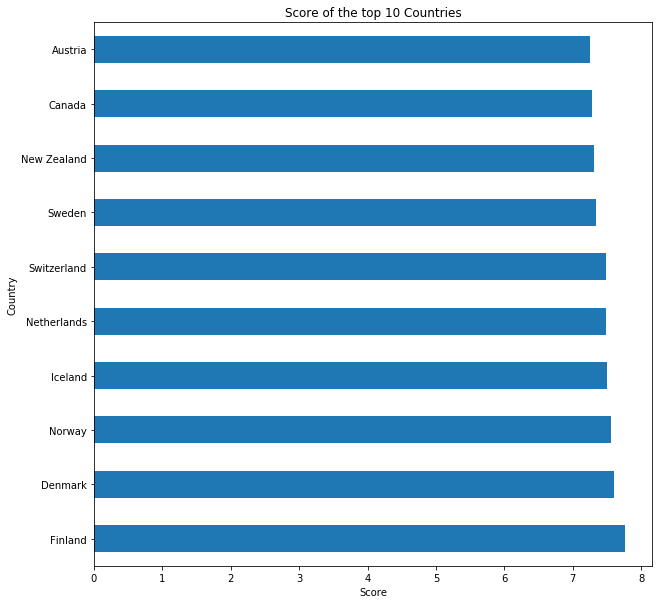

In [12]:
# Mostrando graficamente

WHR['Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.ylabel("Country")
plt.xlabel("Score")
plt.title('Score of the top 10 Countries')

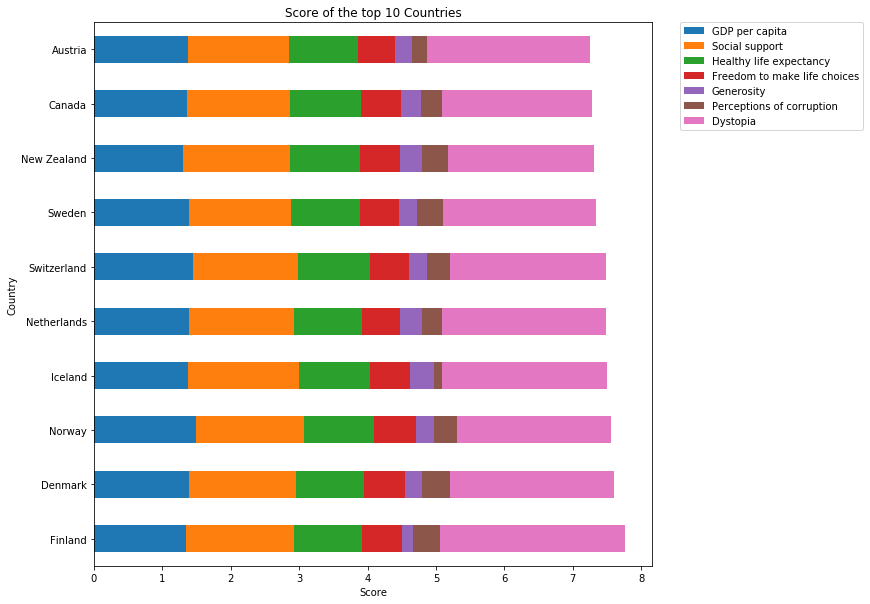

In [13]:
# Índice de Felicidade por variável dos 10 paises mais felizes
WHR[['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
     'Perceptions of corruption', 'Dystopia']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Score")
plt.title('Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Pergunta 2 - Quais são os 10 países menos felizes?

In [14]:
# Ordenando os dez últimos paises pelo ranking geral
WHR.sort_values(by="Overall rank", ascending=False).head(10)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
Country,,,,,,,,,
South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,1.374
Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.457
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.792
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.531
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0.467
Yemen,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077,1.139
Malawi,150,3.410,0.191,0.560,0.495,0.443,0.218,0.089,1.414
Syria,149,3.462,0.619,0.378,0.440,0.013,0.331,0.141,1.540
Botswana,148,3.488,1.041,1.145,0.538,0.455,0.025,0.100,0.184


Text(0.5, 1.0, 'Score of the top 10 Countries')

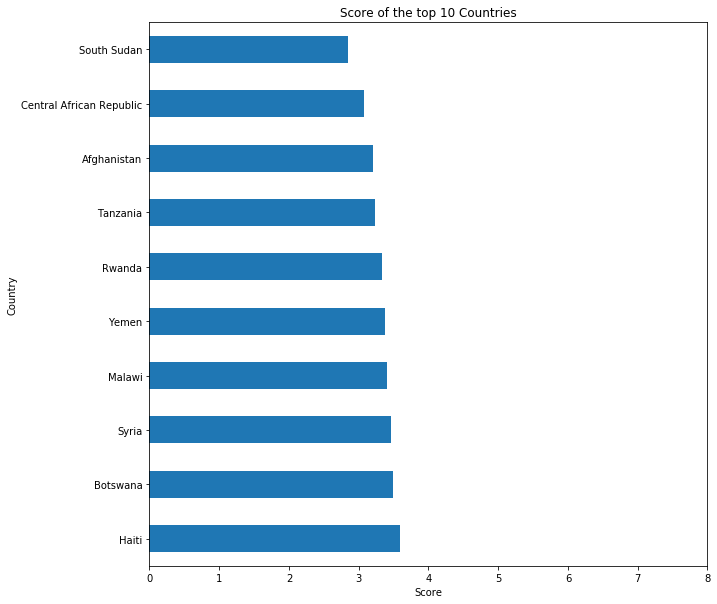

In [15]:
# Mostrando graficamente

WHR['Score'].tail(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.ylabel("Country")
plt.xlabel("Score")
plt.title('Score of the top 10 Countries')

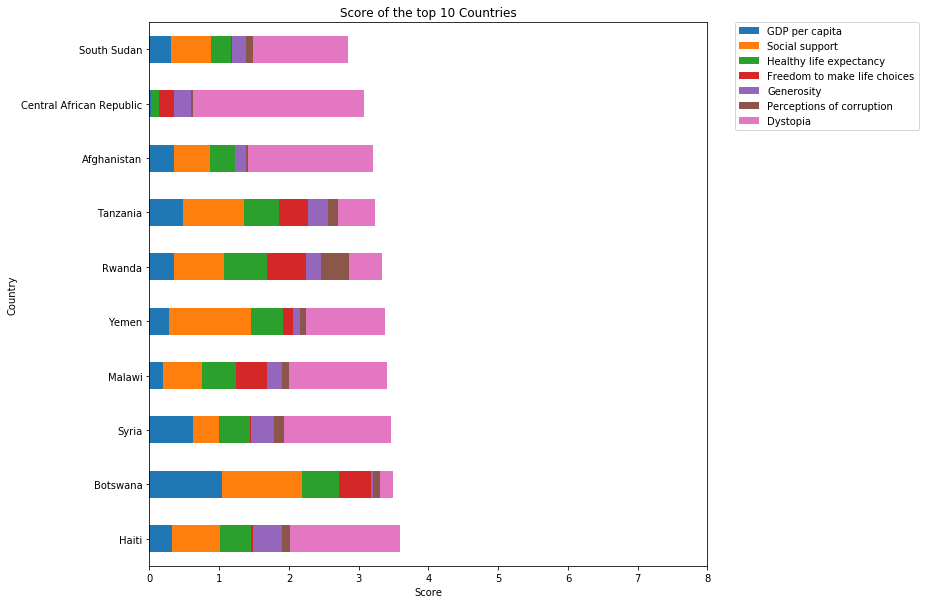

In [16]:
# Índice de Felicidade por variável dos 10 paises menos felizes
WHR[['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
     'Perceptions of corruption', 'Dystopia']].tail(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Score")
plt.title('Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Pergunta 3 - Qual é a média do Índice de Felicidade?

In [17]:
# Média Global do Índice de Felicidade
print("A média global do Índice de Felicidade é: {:.2f} ".format(WHR['Score'].mean()))


A média global do Índice de Felicidade é: 5.41 


## Pergunta 4 - Qual é o Índice de Felicidade por Critério?

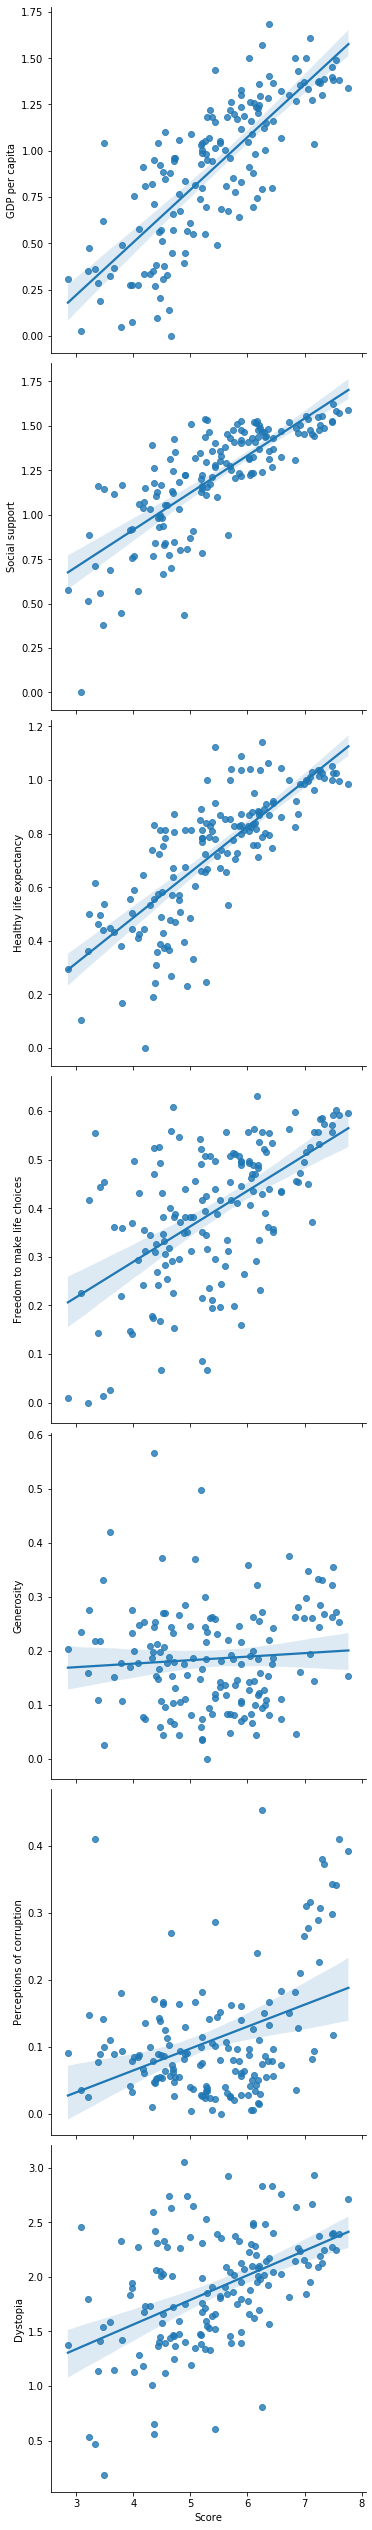

In [18]:
# Gráficos de dispersão do Índice de Felicidade em relação a cada uma das variáveis
sns.pairplot(data=WHR, kind='reg', height = 5,
                  x_vars=['Score'],
                  y_vars=['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 
                          'Generosity', 'Perceptions of corruption', 'Dystopia'])

## Pergunta 5 - Qual a correlação entre o Índice de Felicidade e os Critérios?

In [19]:
# Correlação entre o Índice de Felicidade e cada uma das outras variáveis
WHR.corr(method="pearson", min_periods=20)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959,-0.463371
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613,0.473930
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920,-0.033730
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899,0.026890
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283,-0.005720
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843,0.077521
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538,-0.051231
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000,-0.008120
Dystopia,-0.463371,0.473930,-0.033730,0.026890,-0.005720,0.077521,-0.051231,-0.008120,1.000000


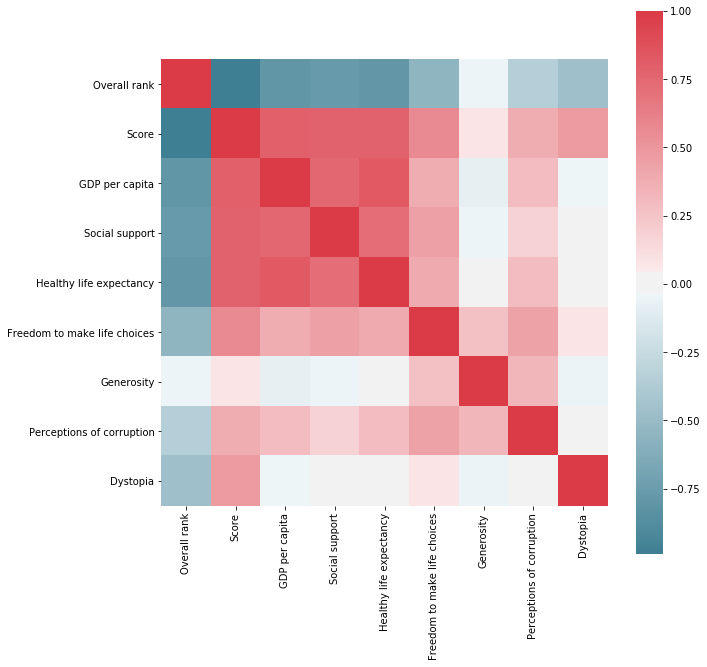

In [20]:
# Mostrando graficamente

corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

## Importando Dashboard do Power BI

In [2]:
# Importando o DeviceCodeLoginAuthentication
from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Iniciando a autenticação do dispositivo
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ANANAP8Z4 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [3]:
access_token = device_auth.get_access_token()

In [4]:
group_id = "29772b25-bf90-4317-8cc4-2331921ae9ef"
report_id = "bc138c3d-0e0f-4806-b786-ecc7e92bf893"

In [5]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report

Report()

## Conclusões


De acordo com a análise os paises que tiveram o maior índice de felicidade foram aqueles que apresentaram maior: 
**PIB per capita; Suporte social; Expectativa de vida saudável.** E são eles:
- 1° - FINLÂNDIA
- 2° - DINAMARCA
- 3° - NORUEGA
- 4° - ISLÂNDIA
- 5° - HOLANDA
- 6° - SUIÇA
- 7° - SUÉCIA
- 8° - NOVA ZELÂNDIA
- 9° - CANADÁ
- 10° - AUSTRIA


Levando-nos a concluir que fatores como: **Liberdade para fazer escolhas; Generosidade; Percepções de corrupção e Distopia** não são de grande relevância quando se trata de felicidade.

## FIM